In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
bc = pd.read_csv('bearing_classes.csv', sep=';')
print(bc.shape)
bc.head()

(113, 2)


,bearing_id,status
0,0,1
1,1,0
2,2,0
3,3,0
4,4,0


In [7]:
print(bc.status.unique())

[1 0]


In [10]:
bs = pd.read_csv('bearing_signals.csv')
print(bs.shape)
bs.head()

(10265700, 13)


,experiment_id,bearing_1_id,bearing_2_id,timestamp,a1_x,a1_y,a1_z,a2_x,a2_y,a2_z,rpm,hz,w
0,1,0,1,0.000000,0.113269,0.149706,-0.110275,-0.186030,0.194450,0.454299,0.0,0.0,0.000006
1,1,0,1,0.000333,-0.367713,-0.228832,0.177821,0.285992,0.002226,-0.043930,0.0,0.0,0.000243
2,1,0,1,0.000667,0.113269,0.149706,-0.398371,-0.091625,0.002226,0.454299,0.0,0.0,0.000369
3,1,0,1,0.001000,-0.175320,-0.228832,-0.110275,0.285992,0.002226,0.255007,0.0,0.0,0.000520
4,1,0,1,0.001333,-0.079124,0.055072,-0.110275,0.191588,0.002226,0.255007,0.0,0.0,0.000175


In [11]:
print(bs.bearing_1_id.unique())

[0]


In [12]:
print(bs.bearing_2_id.unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112]


In [13]:
print(bs.experiment_id.unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112]


In [14]:
bs = bs.drop('bearing_1_id', axis=1)
bs.head()

,experiment_id,bearing_2_id,timestamp,a1_x,a1_y,a1_z,a2_x,a2_y,a2_z,rpm,hz,w
0,1,1,0.000000,0.113269,0.149706,-0.110275,-0.186030,0.194450,0.454299,0.0,0.0,0.000006
1,1,1,0.000333,-0.367713,-0.228832,0.177821,0.285992,0.002226,-0.043930,0.0,0.0,0.000243
2,1,1,0.000667,0.113269,0.149706,-0.398371,-0.091625,0.002226,0.454299,0.0,0.0,0.000369
3,1,1,0.001000,-0.175320,-0.228832,-0.110275,0.285992,0.002226,0.255007,0.0,0.0,0.000520
4,1,1,0.001333,-0.079124,0.055072,-0.110275,0.191588,0.002226,0.255007,0.0,0.0,0.000175


In [15]:
bs.rename(columns={'bearing_2_id': 'bearing_id'}, inplace=True)
bs.head()

,experiment_id,bearing_id,timestamp,a1_x,a1_y,a1_z,a2_x,a2_y,a2_z,rpm,hz,w
0,1,1,0.000000,0.113269,0.149706,-0.110275,-0.186030,0.194450,0.454299,0.0,0.0,0.000006
1,1,1,0.000333,-0.367713,-0.228832,0.177821,0.285992,0.002226,-0.043930,0.0,0.0,0.000243
2,1,1,0.000667,0.113269,0.149706,-0.398371,-0.091625,0.002226,0.454299,0.0,0.0,0.000369
3,1,1,0.001000,-0.175320,-0.228832,-0.110275,0.285992,0.002226,0.255007,0.0,0.0,0.000520
4,1,1,0.001333,-0.079124,0.055072,-0.110275,0.191588,0.002226,0.255007,0.0,0.0,0.000175


In [24]:
bs['experiment_id'].value_counts()

20    166500
61    147900
25    121800
97    114300
24    112200
       ...  
83     77400
29     74700
73     73500
32     72000
81     70200
Name: experiment_id, Length: 112, dtype: int64

In [16]:
df = pd.merge(bs, bc, on='bearing_id')
df.head()

,experiment_id,bearing_id,timestamp,a1_x,a1_y,a1_z,a2_x,a2_y,a2_z,rpm,hz,w,status
0,1,1,0.000000,0.113269,0.149706,-0.110275,-0.186030,0.194450,0.454299,0.0,0.0,0.000006,0
1,1,1,0.000333,-0.367713,-0.228832,0.177821,0.285992,0.002226,-0.043930,0.0,0.0,0.000243,0
2,1,1,0.000667,0.113269,0.149706,-0.398371,-0.091625,0.002226,0.454299,0.0,0.0,0.000369,0
3,1,1,0.001000,-0.175320,-0.228832,-0.110275,0.285992,0.002226,0.255007,0.0,0.0,0.000520,0
4,1,1,0.001333,-0.079124,0.055072,-0.110275,0.191588,0.002226,0.255007,0.0,0.0,0.000175,0


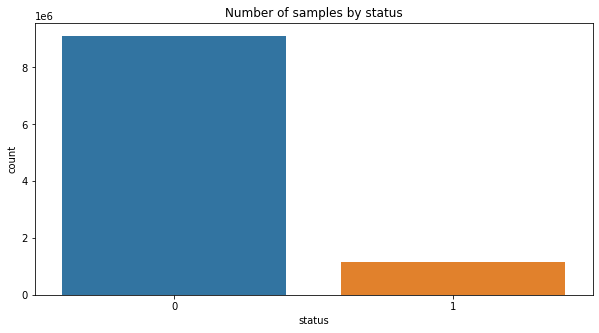

In [17]:
plt.figure(figsize = (10, 5))
sns.countplot(x = 'status', data = df)
plt.title('Number of samples by status')
plt.show()

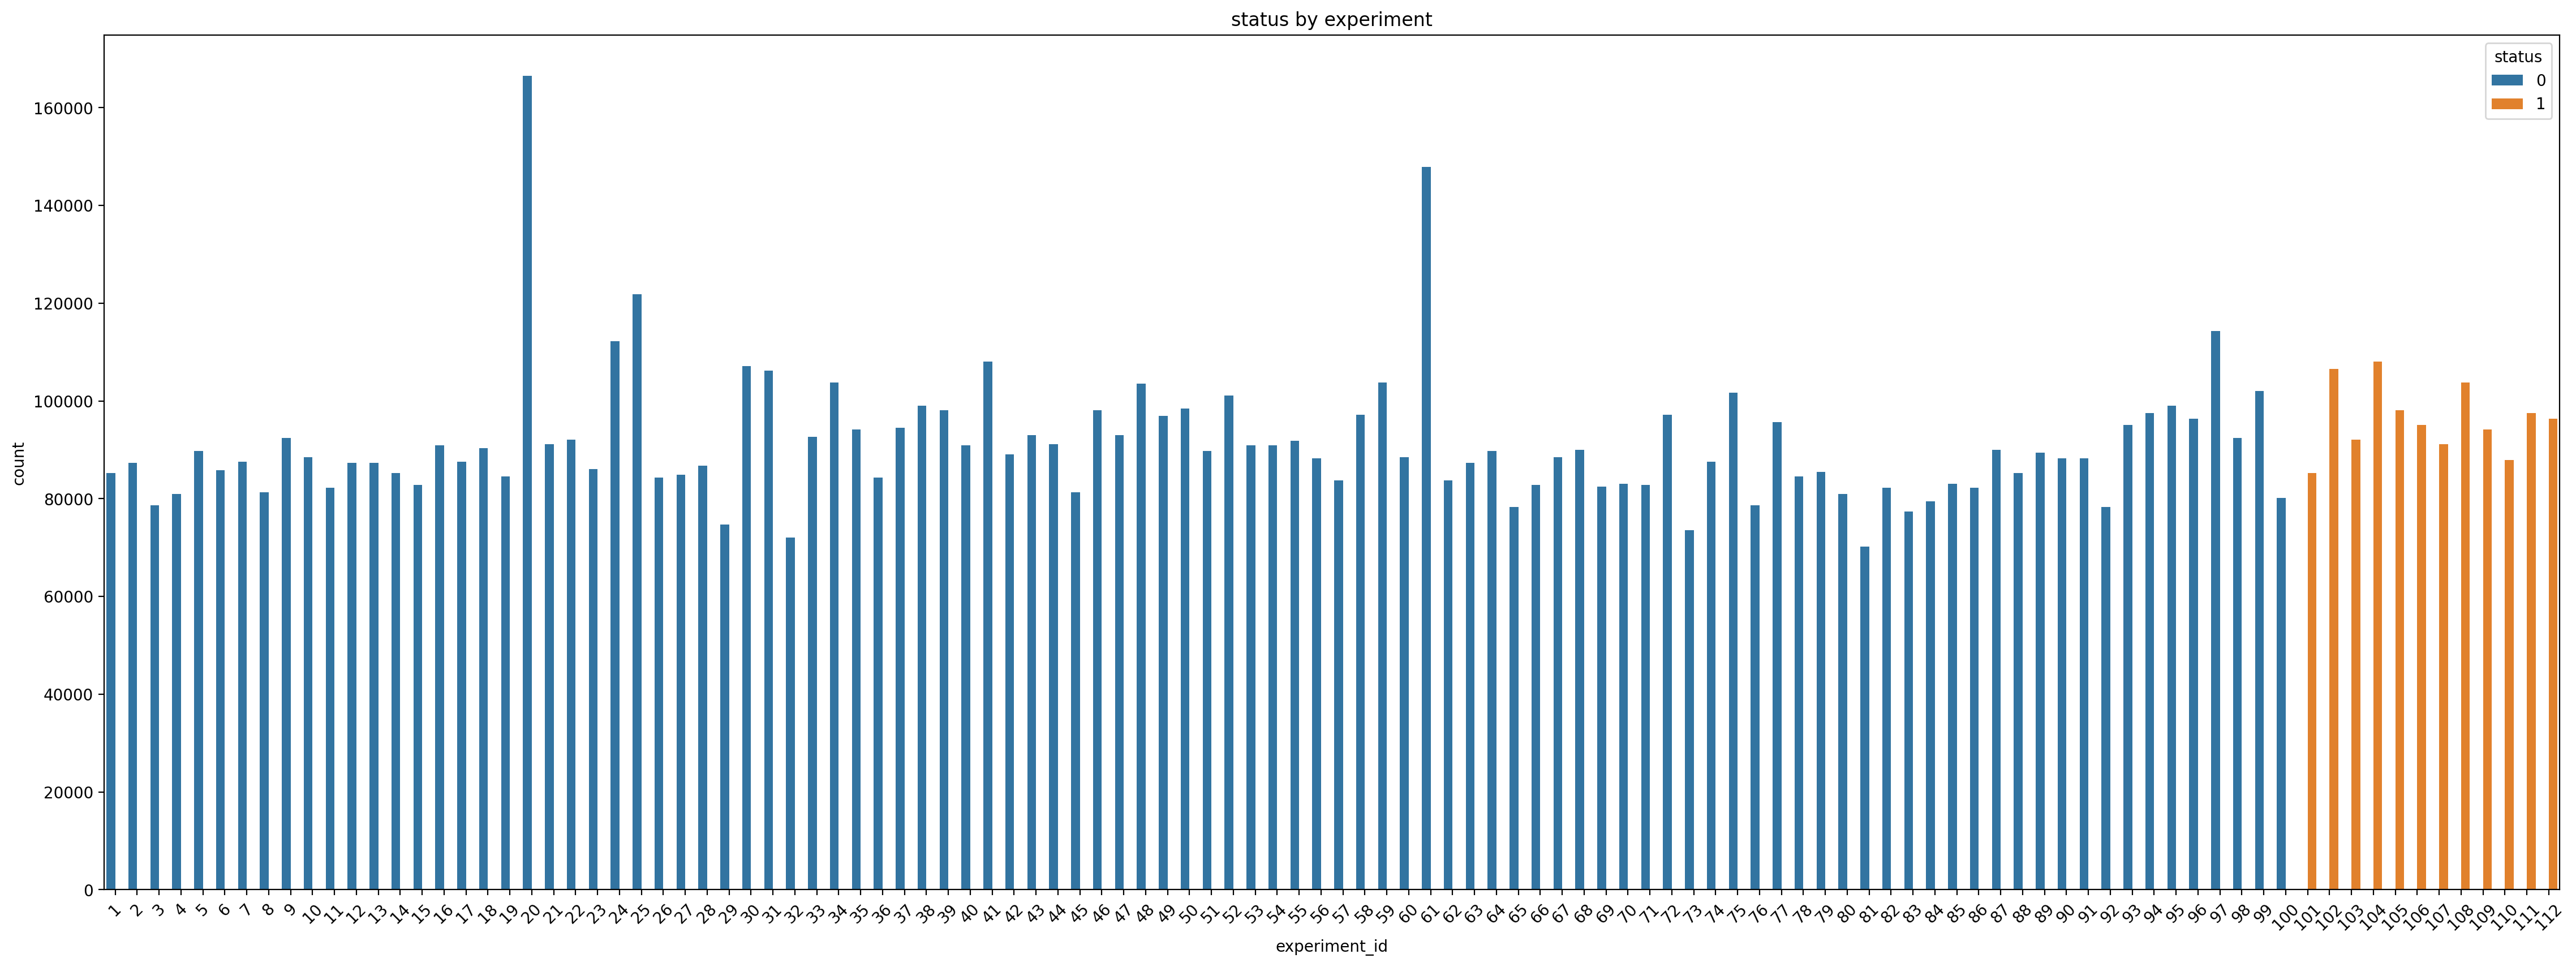

In [23]:
plt.figure(figsize = (28, 10), dpi=200)
sns.countplot(x = 'experiment_id', hue = 'status', data = df)
plt.title('status by experiment')
plt.xticks(rotation=45)
plt.show()

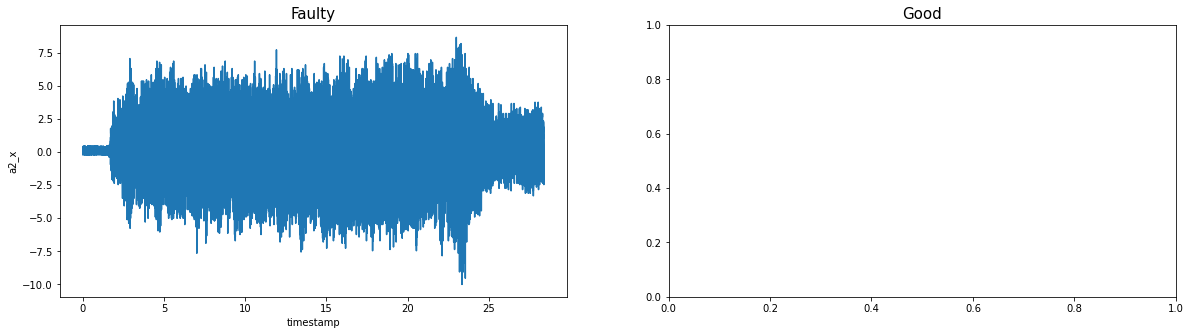

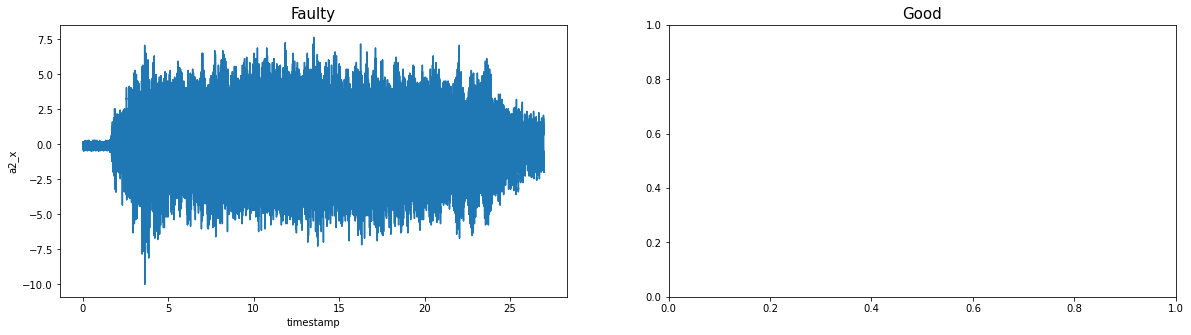

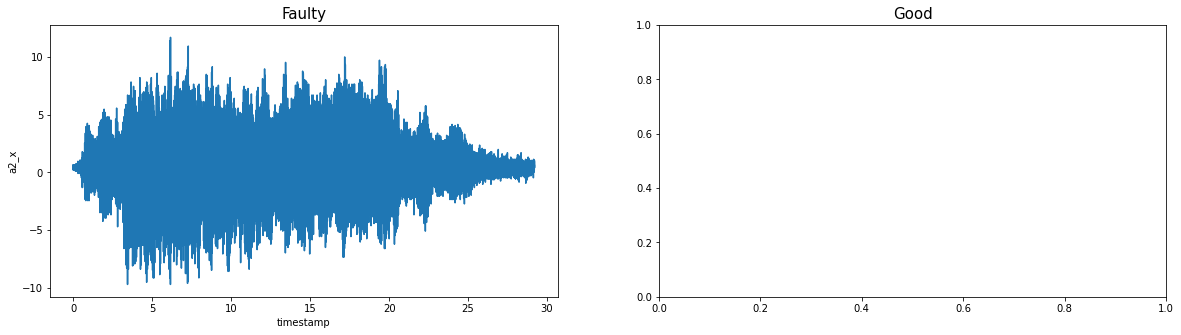

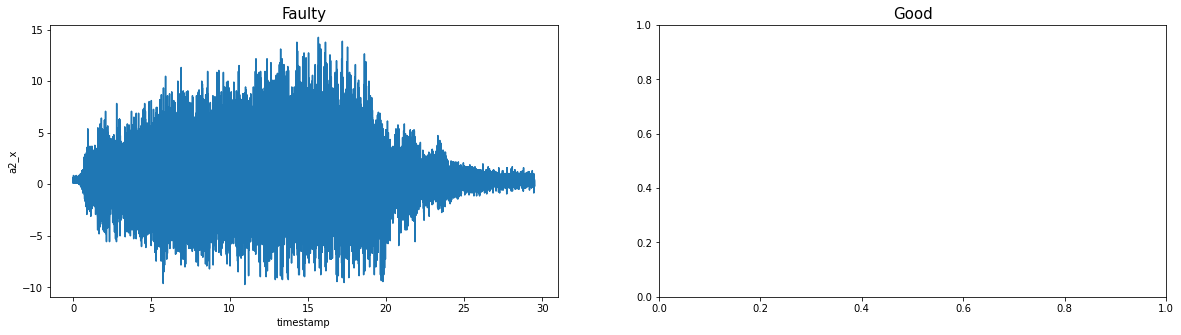

In [36]:
for i in range(1,11,3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    df_36 = df[(df['bearing_id'] == i) & (df['status'] == 0)]
    sns.lineplot(y = 'a2_x', x = 'timestamp', data = df_36, ax=ax1)
    ax1.set_title('Faulty', fontsize = 15)
    df_36 = df[(df['bearing_id'] == i) & (df['status'] == 1)]
    sns.lineplot(y = 'a2_x', x = 'timestamp', data = df_36, ax=ax2)
    ax2.set_title('Good', fontsize = 15)
    plt.show()

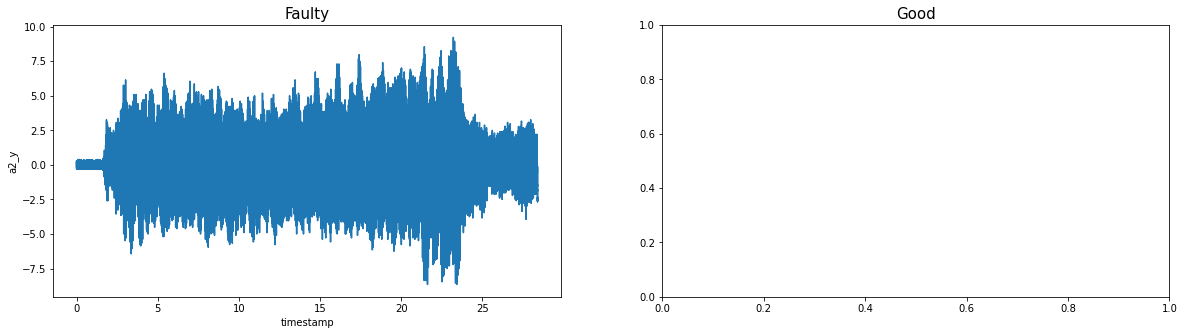

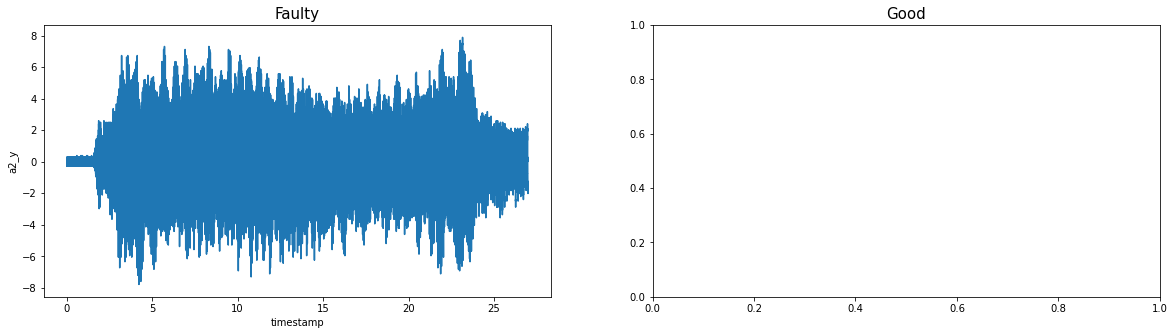

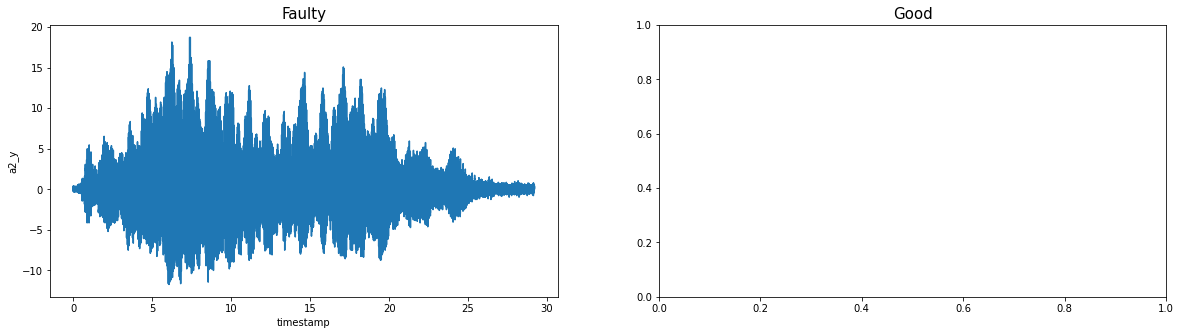

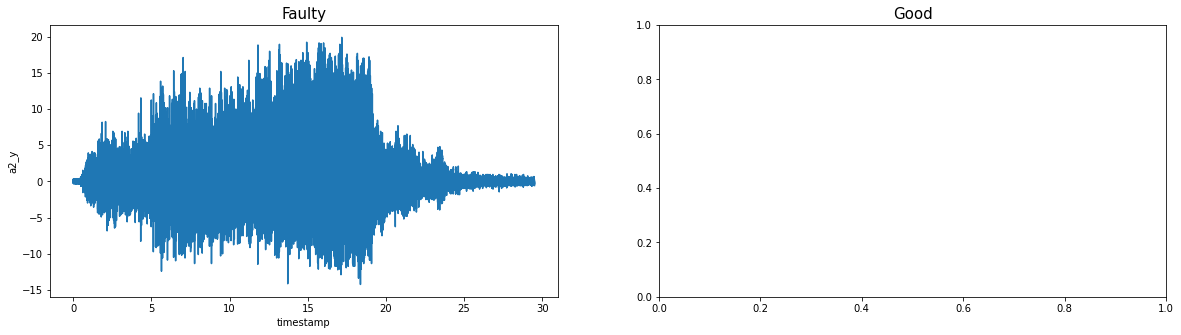

In [37]:
for i in range(1,11,3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    df_36 = df[(df['bearing_id'] == i) & (df['status'] == 0)]
    sns.lineplot(y = 'a2_y', x = 'timestamp', data = df_36, ax=ax1)
    ax1.set_title('Faulty', fontsize = 15)
    df_36 = df[(df['bearing_id'] == i) & (df['status'] == 1)]
    sns.lineplot(y = 'a2_y', x = 'timestamp', data = df_36, ax=ax2)
    ax2.set_title('Good', fontsize = 15)
    plt.show()

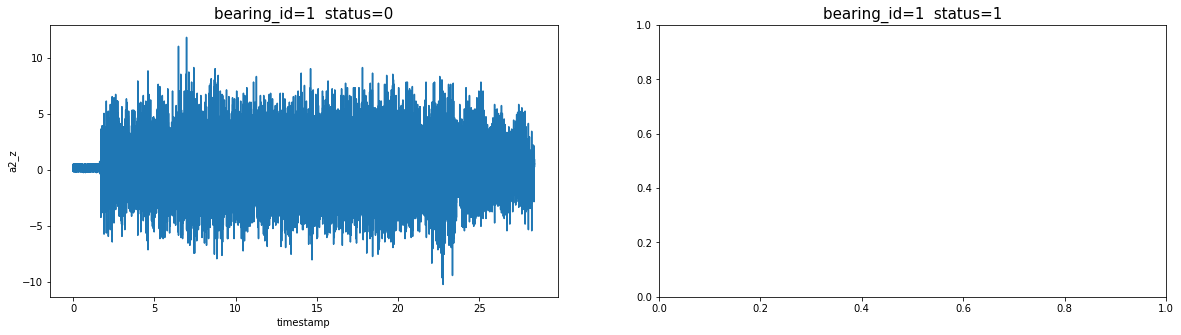

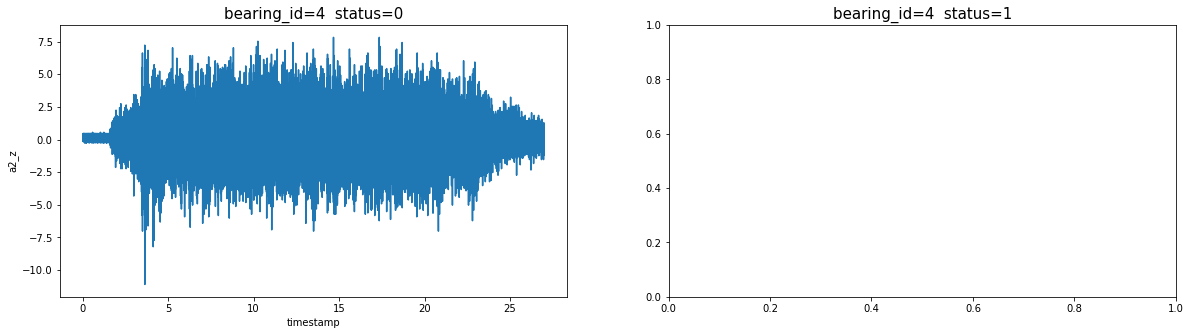

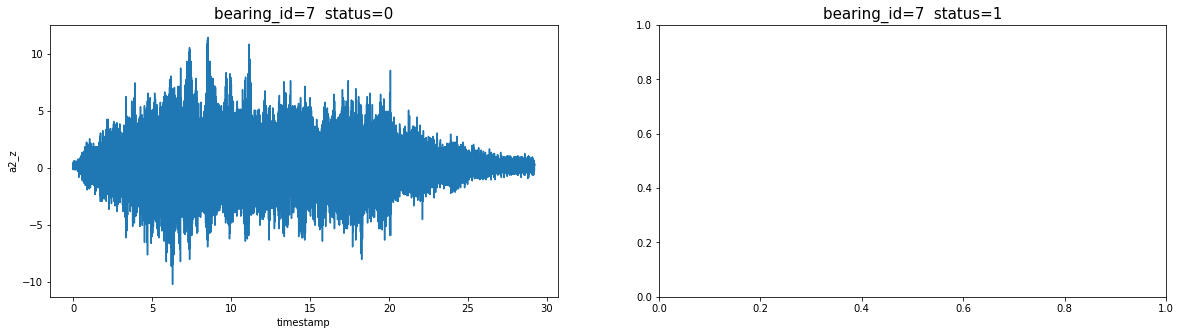

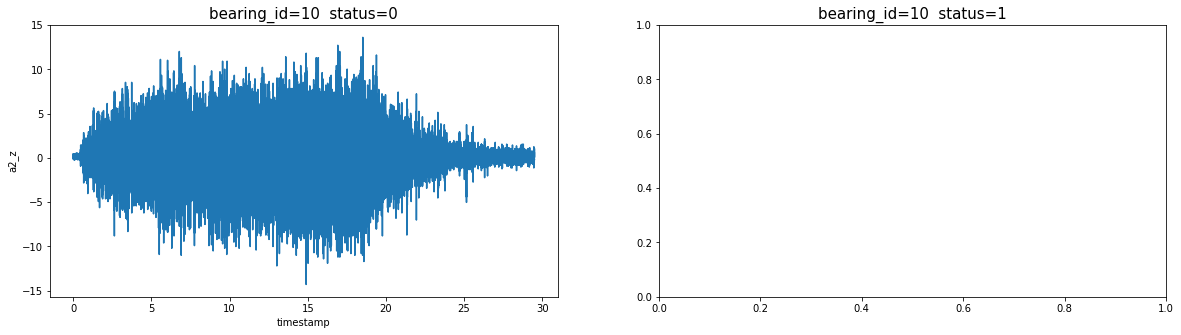

In [39]:
for i in range(1,11,3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    df_36 = df[(df['bearing_id'] == i) & (df['status'] == 0)]
    sns.lineplot(y = 'a2_z', x = 'timestamp', data = df_36, ax=ax1)
    ax1.set_title(f'bearing_id={i}  status=0', fontsize = 15)
    df_36 = df[(df['bearing_id'] == i) & (df['status'] == 1)]
    sns.lineplot(y = 'a2_z', x = 'timestamp', data = df_36, ax=ax2)
    ax2.set_title(f'bearing_id={i}  status=1', fontsize = 15)
    plt.show()

In [40]:
df1 = df[df['timestamp'] <= 10]

In [41]:
len(df1)

3360112

In [42]:
df1.tail(20)

,experiment_id,bearing_id,timestamp,a1_x,a1_y,a1_z,a2_x,a2_y,a2_z,rpm,hz,w,status
10199381,112,112,9.993667,-1.522068,1.001417,-1.454722,-1.130073,-0.189997,3.144738,1500.0,25.0,0.423726,1
10199382,112,112,9.994000,-0.079124,1.096051,-1.838850,0.380396,0.002226,2.247925,1500.0,25.0,0.471930,1
10199383,112,112,9.994333,1.652409,1.758493,-2.895201,1.890865,0.578898,-0.940743,1500.0,25.0,0.615048,1
10199384,112,112,9.994667,2.229587,1.853127,-3.087264,2.079674,0.771121,-3.332244,1500.0,25.0,0.696709,1
10199385,112,112,9.995000,2.229587,1.663858,-2.319009,1.513248,1.732240,-4.926578,1500.0,25.0,0.796267,1
10199386,112,112,9.995333,2.325783,1.096051,-2.126945,0.474800,2.212800,-4.926578,1500.0,25.0,0.576126,1
10199387,112,112,9.995667,1.267624,0.906782,-3.567424,0.002779,2.789471,-2.834015,1500.0,25.0,0.452337,1
10199388,112,112,9.996000,1.171428,1.190686,-5.007902,0.097183,3.750590,-0.841097,1500.0,25.0,0.522730,1
10199389,112,112,9.996333,1.267624,1.285320,-5.295998,0.663609,4.038925,1.550404,1500.0,25.0,0.655243,1
10199390,112,112,9.996667,0.401857,0.812148,-4.143615,2.646099,4.711709,3.244383,1500.0,25.0,0.702737,1
